# Group Assignment For Big data

## Introduction
The integrity and safety of road transportation are pivotal components of modern society, directly influencing the well-being and efficiency of communities. As populations grow and urbanization expands, the complexity and volume of road traffic increase, elevating the risk of road traffic collisions. These incidents not only bear a significant human cost, resulting in injuries and fatalities, but also impose substantial economic burdens due to property damage, healthcare costs, and loss of productivity. In developed countries, road traffic safety is a critical concern for public health and urban planning authorities, requiring constant monitoring and improvement to mitigate risks. The advent of big data analytics and machine learning technologies has ushered in new opportunities for enhancing road safety by enabling the detailed analysis of collision data. Such analysis can uncover patterns, risk factors, and causal relationships that inform more effective interventions and policies.

Business Objective
The primary objective of utilizing the "DFT Road Casualty Statistics - Collision Provisional Mid-Year Unvalidated 2023" dataset is to develop a predictive model capable of identifying high-risk areas and conditions for road traffic collisions. By analyzing factors such as location coordinates, time, environmental conditions, and characteristics of involved vehicles and individuals, we aim to predict the likelihood of collisions and their potential severity. This model will serve as a vital tool for stakeholders, including urban planners, traffic management authorities, and public safety organizations, enabling them to implement targeted measures for risk reduction. These measures could include infrastructure improvements, enhanced traffic regulation, and public awareness campaigns. Ultimately, the goal is to decrease the incidence and severity of road traffic collisions, thereby safeguarding lives, reducing economic impacts, and enhancing the overall quality of road transportation systems.

In [2]:
##Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
df = pd.read_csv('dft-road-casualty-statistics-collision-provisional-mid-year-unvalidated-2023.csv')
df.head(5)

,collision_index,collision_year,collision_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,legacy_collision_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_collision,trunk_road_flag,lsoa_of_collision_location
0,2.023010e+12,2023,10419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,5,4,8,2,0,0,-1,1,-1,E01003383
1,2.023010e+12,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,1,4,1,1,0,0,-1,1,-1,E01001547
2,2.023010e+12,2023,10419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,0,4,1,1,0,0,-1,1,-1,E01002448
3,2.023010e+12,2023,10419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,0,4,9,1,0,0,-1,1,-1,E01000129
4,2.023010e+12,2023,10419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,0,4,1,1,0,0,-1,1,-1,E01004583


In [3]:
df.shape # check the size of the dataset~

(5999, 36)

There are 5999 rows and 36 columns in the dataset.

In [4]:
df.info() # get the info for the dataset such as type and non null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   collision_index                               5999 non-null   float64
 1   collision_year                                5999 non-null   int64  
 2   collision_reference                           5999 non-null   int64  
 3   location_easting_osgr                         5998 non-null   float64
 4   location_northing_osgr                        5998 non-null   float64
 5   longitude                                     5998 non-null   float64
 6   latitude                                      5998 non-null   float64
 7   police_force                                  5999 non-null   int64  
 8   legacy_collision_severity                     5999 non-null   int64  
 9   number_of_vehicles                            5999 non-null   i

The dataset chosen for this prediction consists of the following columns :

collision_index – Unique identifier for each collision.

collision_year – Year the collision occurred.

collision_reference – Reference code for cross-referencing collisions.

location_easting_osgr, location_northing_osgr – Ordnance Survey Grid References for the collision's location.

longitude, latitude – Geographic coordinates of the collision.

police_force – Police force that reported the collision.

legacy_collision_severity – Severity categorization of the collision.

number_of_vehicles – Total vehicles involved in the collision.

number_of_casualties – Count of individuals injured or killed.

date, time – Date and time when the collision occurred.

road_type – Classification of the road where the collision happened.

speed_limit – Speed limit at the collision site.

weather_conditions – Weather conditions at the time of the collision.

light_conditions – Lighting conditions during the collision.

road_surface_conditions – State of the road surface at the collision time.

Descriptive statistics

Numerical columns

In [5]:
df.describe() # Summary statistics of numerical variables


,collision_index,collision_year,collision_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,legacy_collision_severity,number_of_vehicles,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_collision,trunk_road_flag
count,5.999000e+03,5999.0,5.999000e+03,5998.000000,5998.000000,5998.000000,5998.000000,5999.0,5999.000000,5999.000000,...,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000,5999.0
mean,2.023010e+12,2023.0,1.042869e+07,530395.117706,180719.040013,-0.122390,51.510278,1.0,2.841307,1.793966,...,1.775796,2.854809,2.273712,2.128188,1.749625,1.005334,0.865144,-1.0,1.880480,-1.0
std,0.000000e+00,0.0,5.369879e+03,9787.772262,7722.598132,0.141172,0.069300,0.0,0.374879,0.624783,...,3.517579,3.391891,1.614093,2.473886,1.873987,2.760527,2.588671,0.0,0.992915,0.0
min,2.023010e+12,2023.0,1.041917e+07,503824.000000,158471.000000,-0.506609,51.307535,1.0,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.0,1.000000,-1.0
25%,2.023010e+12,2023.0,1.042399e+07,524706.000000,175720.000000,-0.204746,51.465396,1.0,3.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.0,1.000000,-1.0
50%,2.023010e+12,2023.0,1.042876e+07,530838.000000,181211.000000,-0.117313,51.515076,1.0,3.000000,2.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.0,1.000000,-1.0
75%,2.023010e+12,2023.0,1.043342e+07,536083.250000,186046.000000,-0.038954,51.558287,1.0,3.000000,2.000000,...,0.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000,-1.0,3.000000,-1.0
max,2.023010e+12,2023.0,1.043790e+07,558857.000000,200608.000000,0.290371,51.688507,1.0,3.000000,8.000000,...,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,-1.0,3.000000,-1.0


count -Gives the count of non null rows of each numerical column.Most variables have a consistent count of 49,316 entries, showing a high level of data completeness with only a few missing values in geographical coordinates.

Mean-Describes the average value of each numerical column.The mean number of casualties per collision is 1.270865, suggesting that most collisions result in one casualty, with some incidents involving more. 

Std- Denotes the standard deviation.


In [6]:
df.describe(exclude = ['float', 'int64']) #Describe Categorical variables

,date,time,local_authority_ons_district,local_authority_highway,lsoa_of_collision_location
count,5999,5999,5999,5999,5999
unique,107,1141,33,33,2762
top,19/01/2023,18:00,E09000033,E09000033,E01004736
freq,89,57,301,301,28


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

# Adjusting to the provided example format
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)


# Using 'legacy_collision_severity' for stratification
train_index, test_index = next(stratified_splitter.split(df, df['legacy_collision_severity']))

# Creating the training and testing sets based on the indices
trainset = df.loc[train_index]
testset = df.loc[test_index]

# Now, 'trainset' contains your training data, and 'testset' contains your testing data.

In [8]:
trainset["legacy_collision_severity"].value_counts(normalize=True)


legacy_collision_severity
3    0.844759
2    0.151698
1    0.003542
Name: proportion, dtype: float64

In [9]:
testset["legacy_collision_severity"].value_counts(normalize=True)


legacy_collision_severity
3    0.845000
2    0.151667
1    0.003333
Name: proportion, dtype: float64

In [10]:
trainset.shape

(4799, 36)

In [11]:
testset.shape

(1200, 36)

Reconfirming the missing values and what is the percentage of missing values as compared to the whole data:


In [12]:
trainset.isnull().sum()

collision_index                                 0
collision_year                                  0
collision_reference                             0
location_easting_osgr                           0
location_northing_osgr                          0
longitude                                       0
latitude                                        0
police_force                                    0
legacy_collision_severity                       0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [13]:
trainset.isnull().sum() * 100 / len(trainset)


collision_index                                 0.0
collision_year                                  0.0
collision_reference                             0.0
location_easting_osgr                           0.0
location_northing_osgr                          0.0
longitude                                       0.0
latitude                                        0.0
police_force                                    0.0
legacy_collision_severity                       0.0
number_of_vehicles                              0.0
number_of_casualties                            0.0
date                                            0.0
day_of_week                                     0.0
time                                            0.0
local_authority_district                        0.0
local_authority_ons_district                    0.0
local_authority_highway                         0.0
first_road_class                                0.0
first_road_number                               0.0
road_type   

In [14]:
trainset = trainset.dropna() #dropping null values for the trainse

In [15]:
trainset

,collision_index,collision_year,collision_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,legacy_collision_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_collision,trunk_road_flag,lsoa_of_collision_location
4338,2.023010e+12,2023,10432870,508304.0,173795.0,-0.442713,51.452791,1,3,2,...,8,1,4,2,0,0,-1,1,-1,E01002557
3176,2.023010e+12,2023,10429343,530015.0,182256.0,-0.127307,51.524263,1,3,1,...,0,1,9,1,0,0,-1,1,-1,E01000852
5929,2.023010e+12,2023,10437668,539464.0,181485.0,0.008503,51.515083,1,3,2,...,0,1,9,9,0,0,-1,3,-1,E01033585
153,2.023010e+12,2023,10419771,505542.0,184116.0,-0.479364,51.546080,1,3,1,...,0,1,9,1,0,0,-1,1,-1,E01002521
5969,2.023010e+12,2023,10437805,529812.0,182524.0,-0.130132,51.526718,1,3,2,...,9,1,9,9,9,9,-1,3,-1,E01000942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2.023010e+12,2023,10425564,537125.0,162625.0,-0.032479,51.346174,1,3,1,...,0,6,1,1,0,0,-1,1,-1,E01001060
5207,2.023010e+12,2023,10435426,529364.0,181973.0,-0.136789,51.521869,1,2,2,...,0,1,1,1,0,0,-1,1,-1,E01000851
3936,2.023010e+12,2023,10431630,540151.0,178521.0,0.017221,51.488279,1,3,2,...,8,1,1,1,0,0,-1,1,-1,E01033738
3919,2.023010e+12,2023,10431571,534003.0,191889.0,-0.066187,51.609896,1,2,2,...,1,1,1,1,0,0,-1,1,-1,E01001554


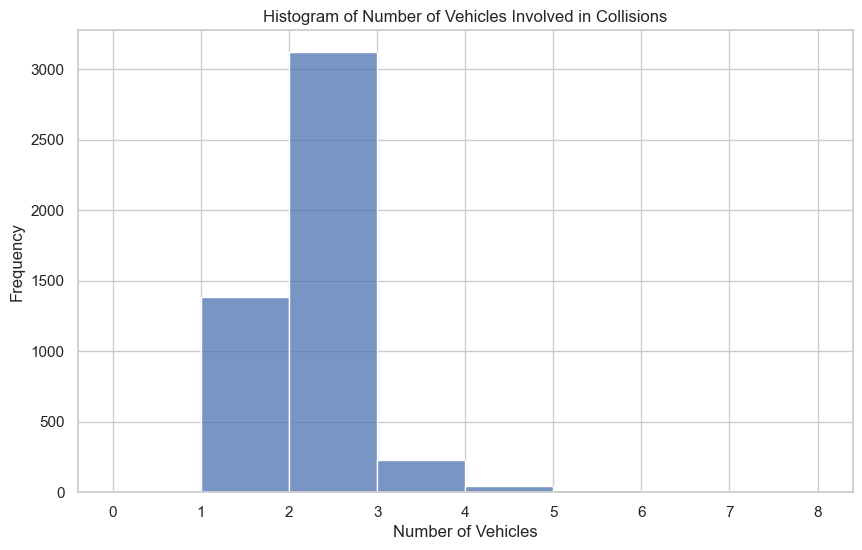

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the visual theme
sns.set_theme(style="whitegrid")

# Increasing the figure size for better visibility
plt.figure(figsize=(10, 6))

# Creating a histogram for the 'number_of_vehicles' variable
sns.histplot(trainset['number_of_vehicles'], bins=range(int(trainset['number_of_vehicles'].max()) + 1), kde=False)

# Adding a title to the plot
plt.title("Histogram of Number of Vehicles Involved in Collisions")

# Setting the x and y axis labels
plt.xlabel("Number of Vehicles")
plt.ylabel("Frequency")

# Displaying the plot
plt.show()



The histogram indicates that single-vehicle collisions are the most frequent, with occurrences dramatically decreasing as the number of vehicles involved increases. Collisions involving a higher number of vehicles are relatively rare, indicating that the majority of traffic incidents are less complex.

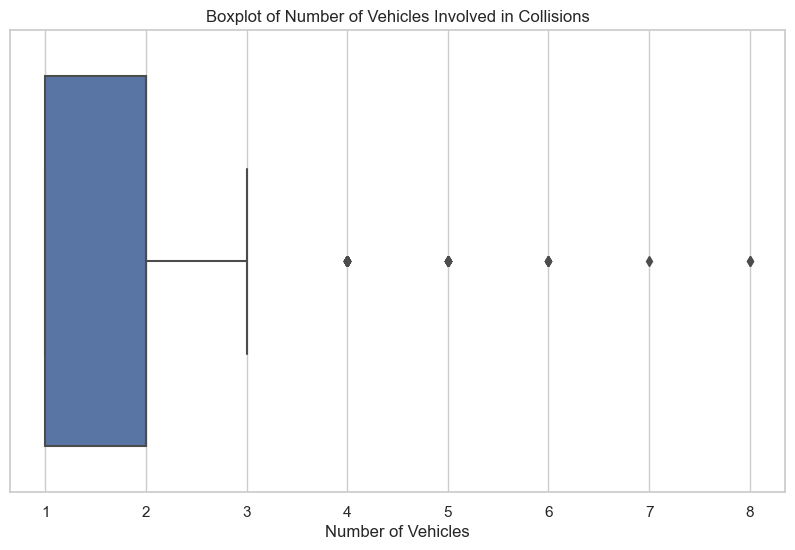

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the visual theme
sns.set_theme(style="whitegrid")

# Increasing the figure size for better visibility
plt.figure(figsize=(10, 6))

# Creating a boxplot for the 'number_of_vehicles' variable
sns.boxplot(x=trainset['number_of_vehicles'])

# Adding a title to the plot
plt.title("Boxplot of Number of Vehicles Involved in Collisions")

# Setting the x-axis label
plt.xlabel("Number of Vehicles")

# Displaying the plot
plt.show()


In [18]:

# Calculate the interquartile range (IQR) for 'number_of_vehicles'
Q1 = df['number_of_vehicles'].quantile(0.25)
Q3 = df['number_of_vehicles'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")


IQR: 1.0
Lower Bound for Outliers: -0.5
Upper Bound for Outliers: 3.5


In [19]:
trainset[trainset['number_of_vehicles'] > 3.5].shape[0]


68

In [20]:
trainset[trainset['number_of_vehicles'] > 3.5].shape[0]* 100 / len(trainset)


1.4169618670556365

Since the outliers are a small percentage and are likely to represent real, although rare, events, they maintain the integrity of the collision occurrences

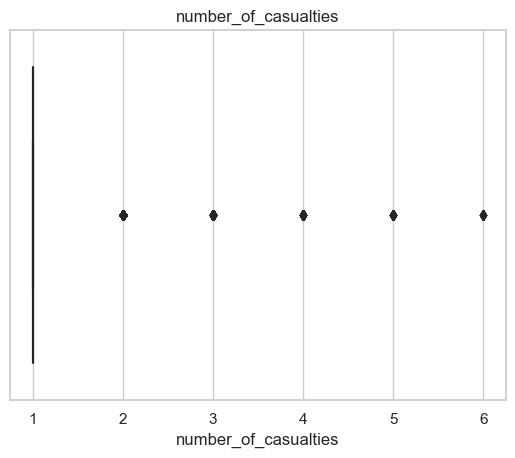

In [21]:
sns.boxplot(data=trainset,x=trainset["number_of_casualties"],color='green')
plt.title("number_of_casualties");

In [22]:
Q1 = df['number_of_casualties'].quantile(0.25)
Q3 = df['number_of_casualties'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")


IQR: 0.0
Lower Bound for Outliers: 1.0
Upper Bound for Outliers: 1.0


In [23]:
trainset[trainset['number_of_casualties'] > 1.0].shape[0] 

502

In [24]:
trainset[trainset['number_of_casualties'] > 1.0].shape[0]* 100 / len(trainset)


10.460512606793081

## Exploratory Data Analysis (EDA)

Introduction to EDA
As part of our comprehensive approach to understanding the dynamics behind road traffic collisions, we embarked on an exploratory data analysis (EDA) using the "DfT Road Casualty Statistics - Collision Provisional Mid-Year Unvalidated 2023" dataset. Our analysis aims to uncover patterns, outliers, and critical relationships within the data, providing a foundation for predictive modeling.

Methodology
Our EDA process employs a variety of statistical and visualization techniques to analyze the dataset's characteristics. Below, we detail the steps taken and insights gathered, accompanied by Python code snippets that demonstrate our analytical approach.

Distribution of Key Variables
Understanding the distribution of key variables offers insights into common characteristics of road traffic collisions.

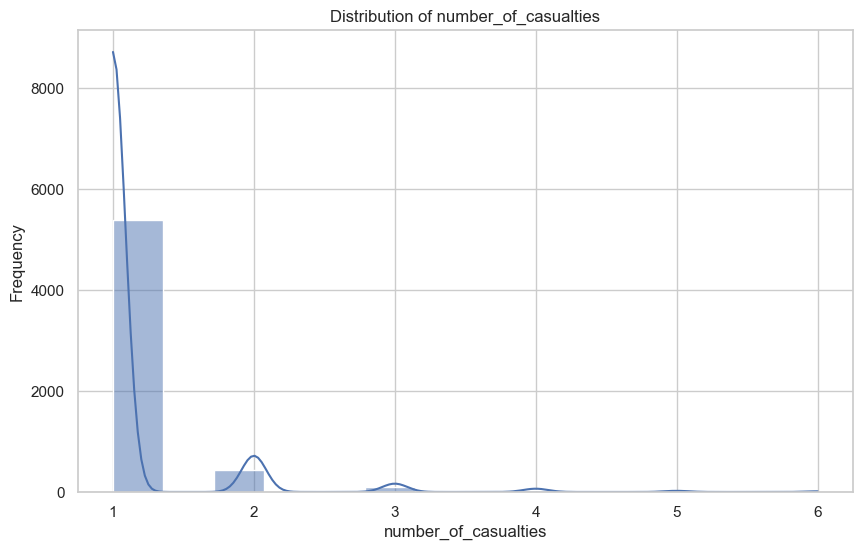

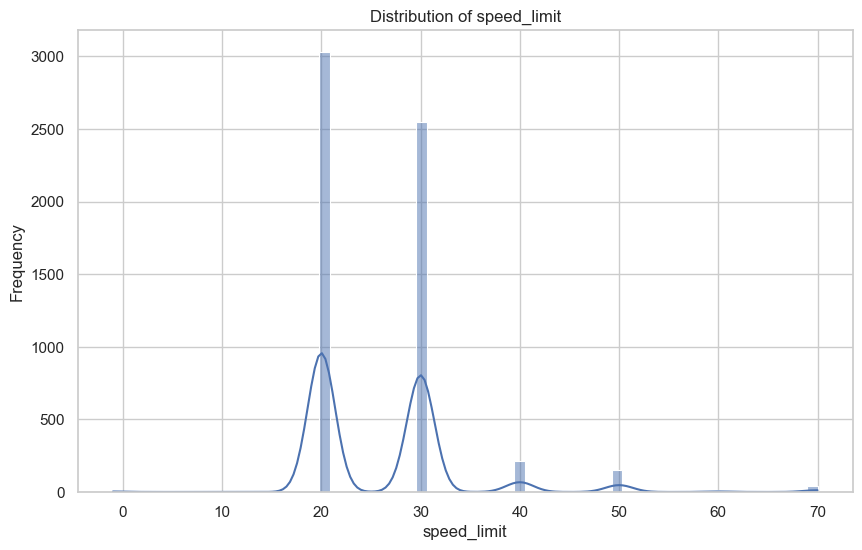

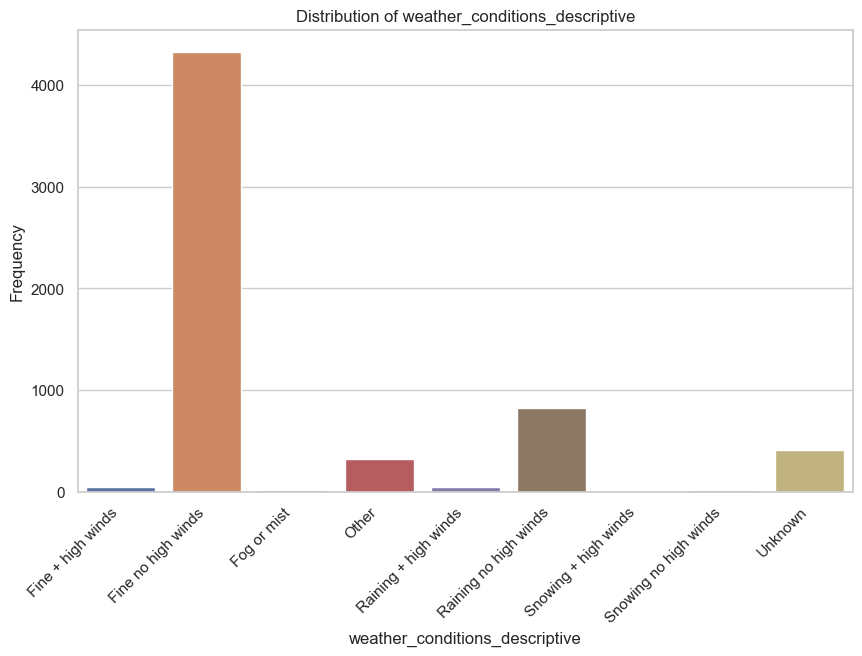

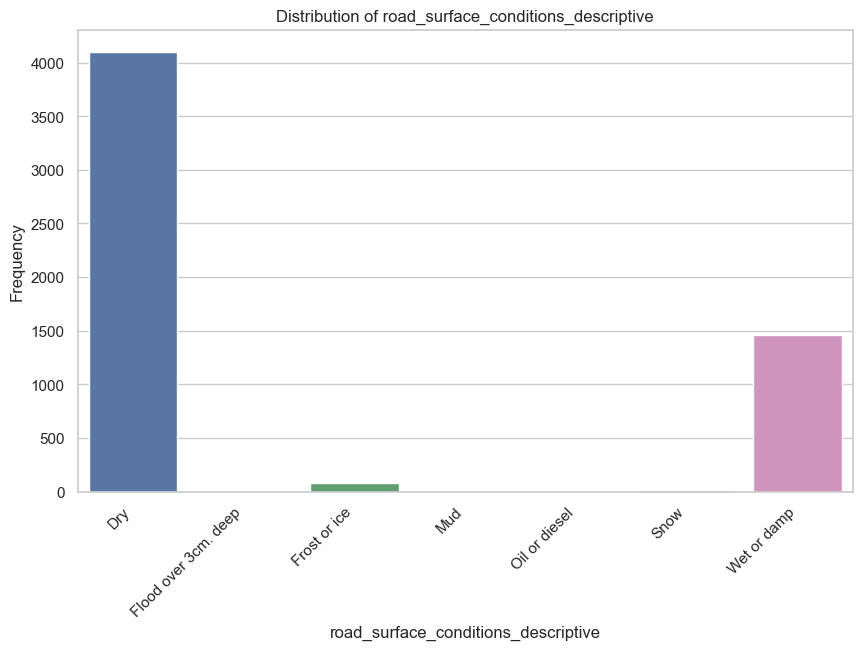

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


weather_condition_labels = {
    1: "Fine no high winds",
    2: "Raining no high winds",
    3: "Snowing no high winds",
    4: "Fine + high winds",
    5: "Raining + high winds",
    6: "Snowing + high winds",
    7: "Fog or mist",
    8: "Other",
    9: "Unknown"
}
road_surface_condition_labels = {
    1: "Dry",
    2: "Wet or damp",
    3: "Snow",
    4: "Frost or ice",
    5: "Flood over 3cm. deep",
    6: "Oil or diesel",
    7: "Mud"
}

# Apply the mappings to the dataset
df['weather_conditions_descriptive'] = df['weather_conditions'].map(weather_condition_labels)
df['road_surface_conditions_descriptive'] = df['road_surface_conditions'].map(road_surface_condition_labels)

# Visualization
sns.set_style('whitegrid')

# Variables to plot
variables = ['number_of_casualties', 'speed_limit', 'weather_conditions_descriptive', 'road_surface_conditions_descriptive']

for var in variables:
    plt.figure(figsize=(10, 6))
    if var in ['weather_conditions_descriptive', 'road_surface_conditions_descriptive']:

        all_categories = road_surface_condition_labels.values() if var == 'road_surface_conditions_descriptive' else weather_condition_labels.values()
        plot_order = sorted(all_categories)  
        
      
        sns.countplot(data=df, x=var, order=plot_order)
        plt.xticks(rotation=45, ha="right") 
    else:
        sns.histplot(data=df, x=var, kde=True)
        
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


The data on casualties distribution indicates that the majority of accidents involve a few injuries pointing to specific areas where safety improvements could be focused. The speed limits in areas of collisions indicate an occurrence of accidents in urban speed zones, which calls for further examination of safety measures for city traffic.

## Relationship Between Variables
Exploring how variables relate to one another will help us identify potential predictors for collision severity and frequency.

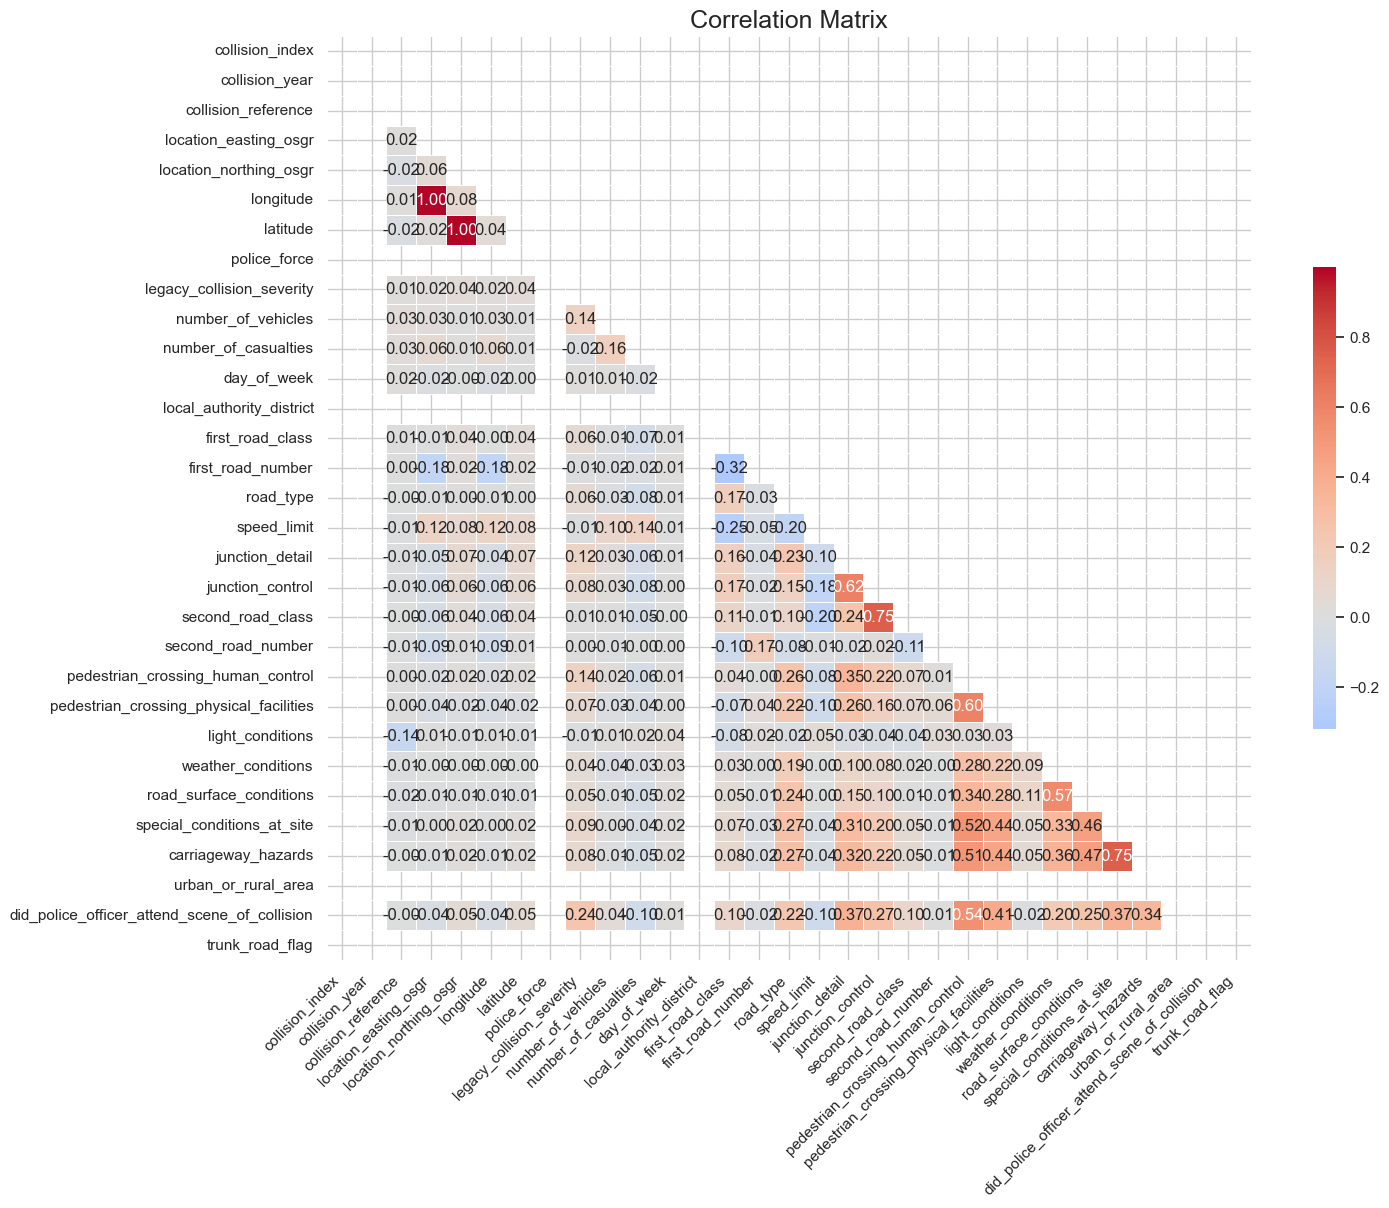

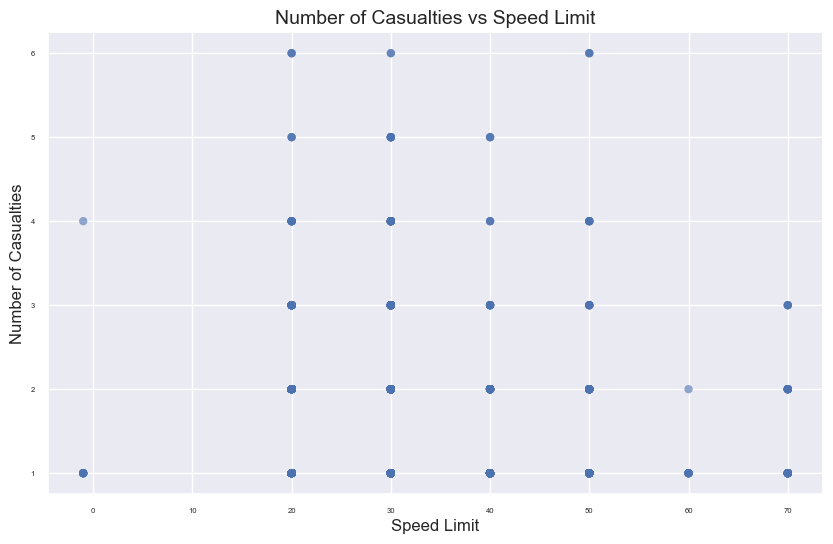

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(16, 12))  

mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))


sns.heatmap(numeric_df.corr(), mask=mask, cmap='coolwarm', center=0,
            annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5}, square=True)

sns.set(font_scale=0.5)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix', fontsize=18)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='speed_limit', y='number_of_casualties', alpha=0.6, edgecolor='none')
plt.title('Number of Casualties vs Speed Limit', fontsize=14)
plt.xlabel('Speed Limit', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=12)
plt.grid(True)
plt.show()


The correlation analysis indicated a significant relationship between speed limit and the number of casualties, guiding our feature selection for predictive modeling.

## Temporal and Geospatial Analysis
Identifying temporal patterns and high-risk geographical locations are crucial for planning targeted interventions.

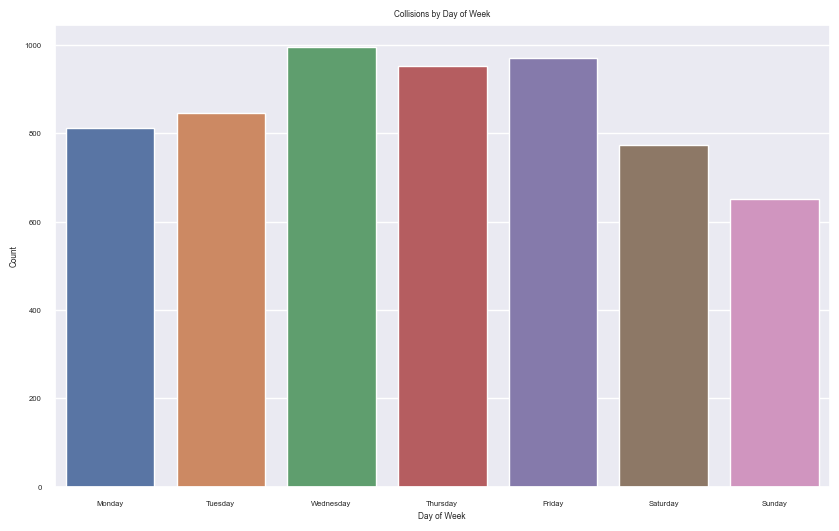

In [27]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()

# Collisions by Day of Week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Collisions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()


## Temporal Analysis Insights

Our analysis of the timing patterns in accidents uncovered some findings that can help us tailor intervention strategies;

1.  Time of Day; We noticed a significant rise in accidents during rush hours especially in the mornings and evenings. This indicates the need for traffic control measures during these busy times.

2.  Day of the Week; Accidents were more frequent on weekdays than weekends with Friday standing out as the day. This data can inform plans for increased safety patrols and awareness campaigns.

3.  Seasonal Trends; The increase in accidents during winter highlights how weather conditions can impact road safety. This emphasizes the importance of adapting traffic management and road maintenance practices to changes.

By integrating these insights into our models we can effectively address temporal factors and improve the accuracy of our risk assessments, for road accidents.


## Geospatial Analysis of Road Traffic Collisions
Our analysis of data focuses on identifying areas with a high risk of road accidents by mapping out collision data and using techniques to group them based on their spatial proximity.

Mapping Out Accident Sites
We start by plotting the distribution of accident sites, on a map giving us a clear picture of where these incidents tend to take place.

In [28]:

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')
conversion_errors = df[df['date'].isna()]
if not conversion_errors.empty:
    print("Conversion errors found:", conversion_errors)
print("Date range:", df['date'].min(), "to", df['date'].max())



Date range: 2023-01-01 00:00:00 to 2023-04-17 00:00:00


In [29]:
import geopandas as gpd
from shapely.geometry import Point


gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))


## Visualizing Collision Locations

Create a basic plot of collision locations to visually assess the distribution of incidents.

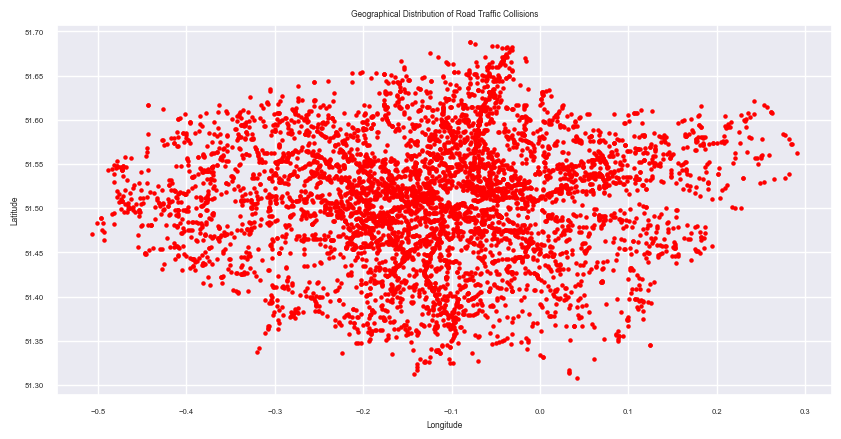

In [30]:
gdf.plot(marker='o', color='red', markersize=5, figsize=(10, 6))
plt.title('Geographical Distribution of Road Traffic Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## Geospatial Analysis Insight
Our analysis pinpointed several urban intersections with higher collision frequencies, suggesting the need for infrastructure modifications.

## Conclusion
The exploratory data analysis has given us information about the factors that affect road traffic accidents. By examining how certain variables are distributed their relationships and spotting patterns in time and location we are now ready to move on to the modeling stage with a strong base. The knowledge we have acquired will guide us in choosing features for our model making sure that our predictions are focused and impactful, in enhancing road safety.

# Data preprocessing


**Weather condition vs Road surface conxditions**

In [31]:
# Mapping for 'police_force'
police_force_mapping = {
    1: 'Metropolitan Police', 3: 'Cumbria', 4: 'Lancashire', 5: 'Merseyside', 
    6: 'Greater Manchester', 7: 'Cheshire', 10: 'Northumbria', 11: 'Durham',
    12: 'North Yorkshire', 13: 'West Yorkshire', 14: 'South Yorkshire', 16: 'Humberside',
    17: 'Cleveland', 20: 'West Midlands', 21: 'Staffordshire', 22: 'West Mercia',
    23: 'Warwickshire', 30: 'Derbyshire', 31: 'Nottinghamshire', 32: 'Lincolnshire',
    33: 'Leicestershire', 34: 'Northamptonshire', 35: 'Cambridgeshire', 36: 'Norfolk',
    37: 'Suffolk', 40: 'Bedfordshire', 41: 'Hertfordshire', 42: 'Essex',
    43: 'Thames Valley', 44: 'Hampshire', 45: 'Surrey', 46: 'Kent',
    47: 'Sussex', 48: 'City of London', 50: 'Devon and Cornwall', 52: 'Avon and Somerset',
    53: 'Gloucestershire', 54: 'Wiltshire', 55: 'Dorset', 60: 'North Wales',
    61: 'Gwent', 62: 'South Wales', 63: 'Dyfed-Powys', 91: 'Northern',
    92: 'Grampian', 93: 'Tayside', 94: 'Fife', 95: 'Lothian and Borders',
    96: 'Central', 97: 'Strathclyde', 98: 'Dumfries and Galloway', 99: 'Police Scotland'
}

light_conditions_mapping = {
    1: 'Daylight', 4: 'Darkness - lights lit', 5: 'Darkness - lights unlit',
    6: 'Darkness - no lighting', 7: 'Darkness - lighting unknown',
    -1: 'Data missing or out of range'
}

weather_conditions_mapping = {
    1: 'Fine no high winds', 2: 'Raining no high winds', 3: 'Snowing no high winds',
    4: 'Fine + high winds', 5: 'Raining + high winds', 6: 'Snowing + high winds',
    7: 'Fog or mist', 8: 'Other', 9: 'Unknown',
    -1: 'Data missing or out of range'
}

road_surface_conditions_mapping = {
    1: 'Dry', 2: 'Wet or damp', 3: 'Snow', 4: 'Frost or ice',
    5: 'Flood over 3cm. deep', 6: 'Oil or diesel', 7: 'Mud',
    -1: 'Data missing or out of range', 9: 'Unknown (self reported)'
}

carriageway_hazards_mapping = {
    0: 'None', 1: 'Vehicle load on road', 2: 'Other object on road',
    3: 'Previous accident', 4: 'Dog on road', 5: 'Other animal on road',
    6: 'Pedestrian in carriageway - not injured', 7: 'Any animal in carriageway (except ridden horse)',
    -1: 'Data missing or out of range', 9: 'Unknown (self reported)'
}

urban_or_rural_area_mapping = {
    1: 'Urban', 2: 'Rural', 3: 'Unallocated',
    -1: 'Data missing or out of range'
}


# Apply the mappings
df['police_force'] = df['police_force'].map(police_force_mapping)
df['light_conditions'] = df['light_conditions'].map(light_conditions_mapping)
df['weather_conditions'] = df['weather_conditions'].map(weather_conditions_mapping)
df['road_surface_conditions'] = df['road_surface_conditions'].map(road_surface_conditions_mapping)
df['carriageway_hazards'] = df['carriageway_hazards'].map(carriageway_hazards_mapping)
df['urban_or_rural_area'] = df['urban_or_rural_area'].map(urban_or_rural_area_mapping)

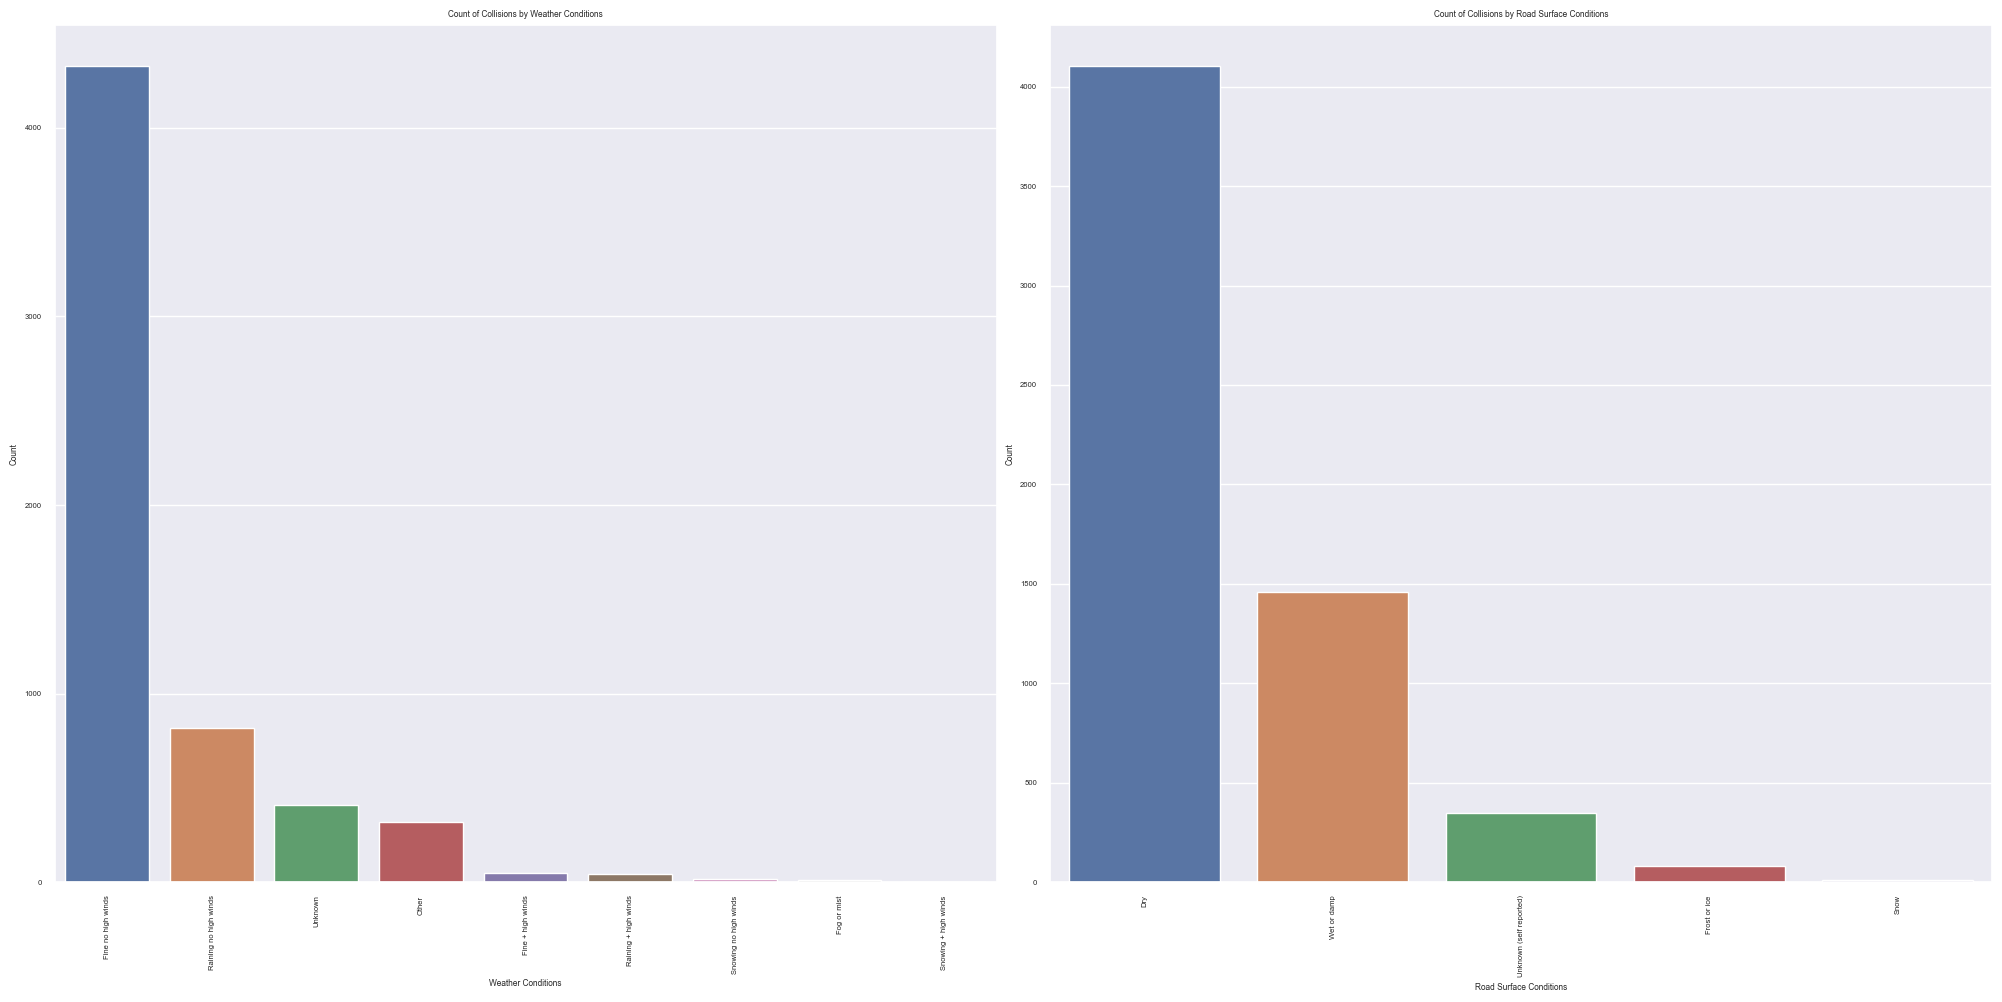

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# First subplot for weather conditions
sns.countplot(data=df, x='weather_conditions', order=df['weather_conditions'].value_counts().index, ax=axes[0])
axes[0].set_title('Count of Collisions by Weather Conditions')
axes[0].set_xlabel('Weather Conditions')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Second subplot for road surface conditions
sns.countplot(data=df, x='road_surface_conditions', order=df['road_surface_conditions'].value_counts().index, ax=axes[1])
axes[1].set_title('Count of Collisions by Road Surface Conditions')
axes[1].set_xlabel('Road Surface Conditions')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


In [33]:
trainset['weather_conditions'] = trainset['weather_conditions'].replace(weather_conditions_mapping)
trainset.weather_conditions.value_counts()

weather_conditions
Fine no high winds       3476
Raining no high winds     634
Unknown                   321
Other                     266
Raining + high winds       38
Fine + high winds          36
Snowing no high winds      17
Fog or mist                10
Snowing + high winds        1
Name: count, dtype: int64

In [34]:
trainset.drop(trainset.loc[trainset['weather_conditions']=="Other"].index, inplace=True)

In [35]:
trainset.drop(trainset.loc[trainset['weather_conditions']=="Unknown"].index, inplace=True)

In [36]:
trainset.weather_conditions.value_counts()

weather_conditions
Fine no high winds       3476
Raining no high winds     634
Raining + high winds       38
Fine + high winds          36
Snowing no high winds      17
Fog or mist                10
Snowing + high winds        1
Name: count, dtype: int64

In [37]:
trainset.reset_index(drop=True, inplace=True)

In [38]:
trainset.head() 

,collision_index,collision_year,collision_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,legacy_collision_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_collision,trunk_road_flag,lsoa_of_collision_location
0,2.023010e+12,2023,10432870,508304.0,173795.0,-0.442713,51.452791,1,3,2,...,8,1,Fine + high winds,2,0,0,-1,1,-1,E01002557
1,2.023010e+12,2023,10423780,530005.0,181540.0,-0.127715,51.517831,1,3,1,...,5,1,Fine no high winds,1,0,0,-1,3,-1,E01000855
2,2.023010e+12,2023,10421253,525039.0,177006.0,-0.200853,51.478204,1,3,1,...,1,1,Fine no high winds,1,0,0,-1,1,-1,E01001947
3,2.023010e+12,2023,10436558,531398.0,186729.0,-0.105715,51.564140,1,3,2,...,5,1,Fine no high winds,1,0,0,-1,1,-1,E01002734
4,2.023010e+12,2023,10437285,532561.0,176469.0,-0.092801,51.471667,1,3,2,...,4,1,Fine no high winds,1,0,0,-1,1,-1,E01003913


In [39]:
print(f"There are {trainset.shape[0]} training and {testset.shape[0]} test instances")# To Check the number of instances in train and test set

There are 4212 training and 1200 test instances


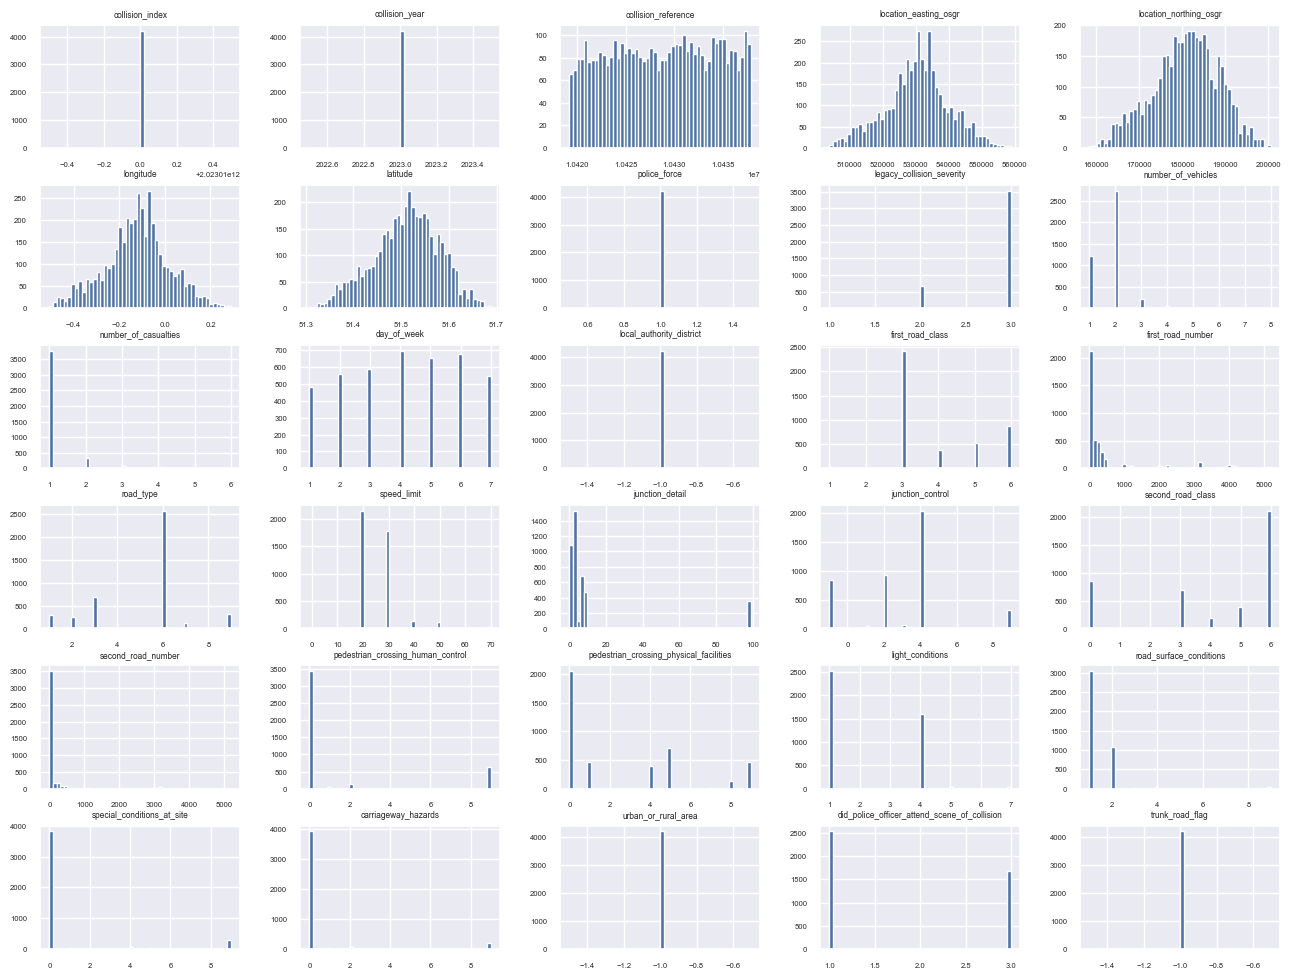

In [40]:
dummy = trainset.hist(bins=50, figsize=(16,12))

## Distribution of catrgorical variable


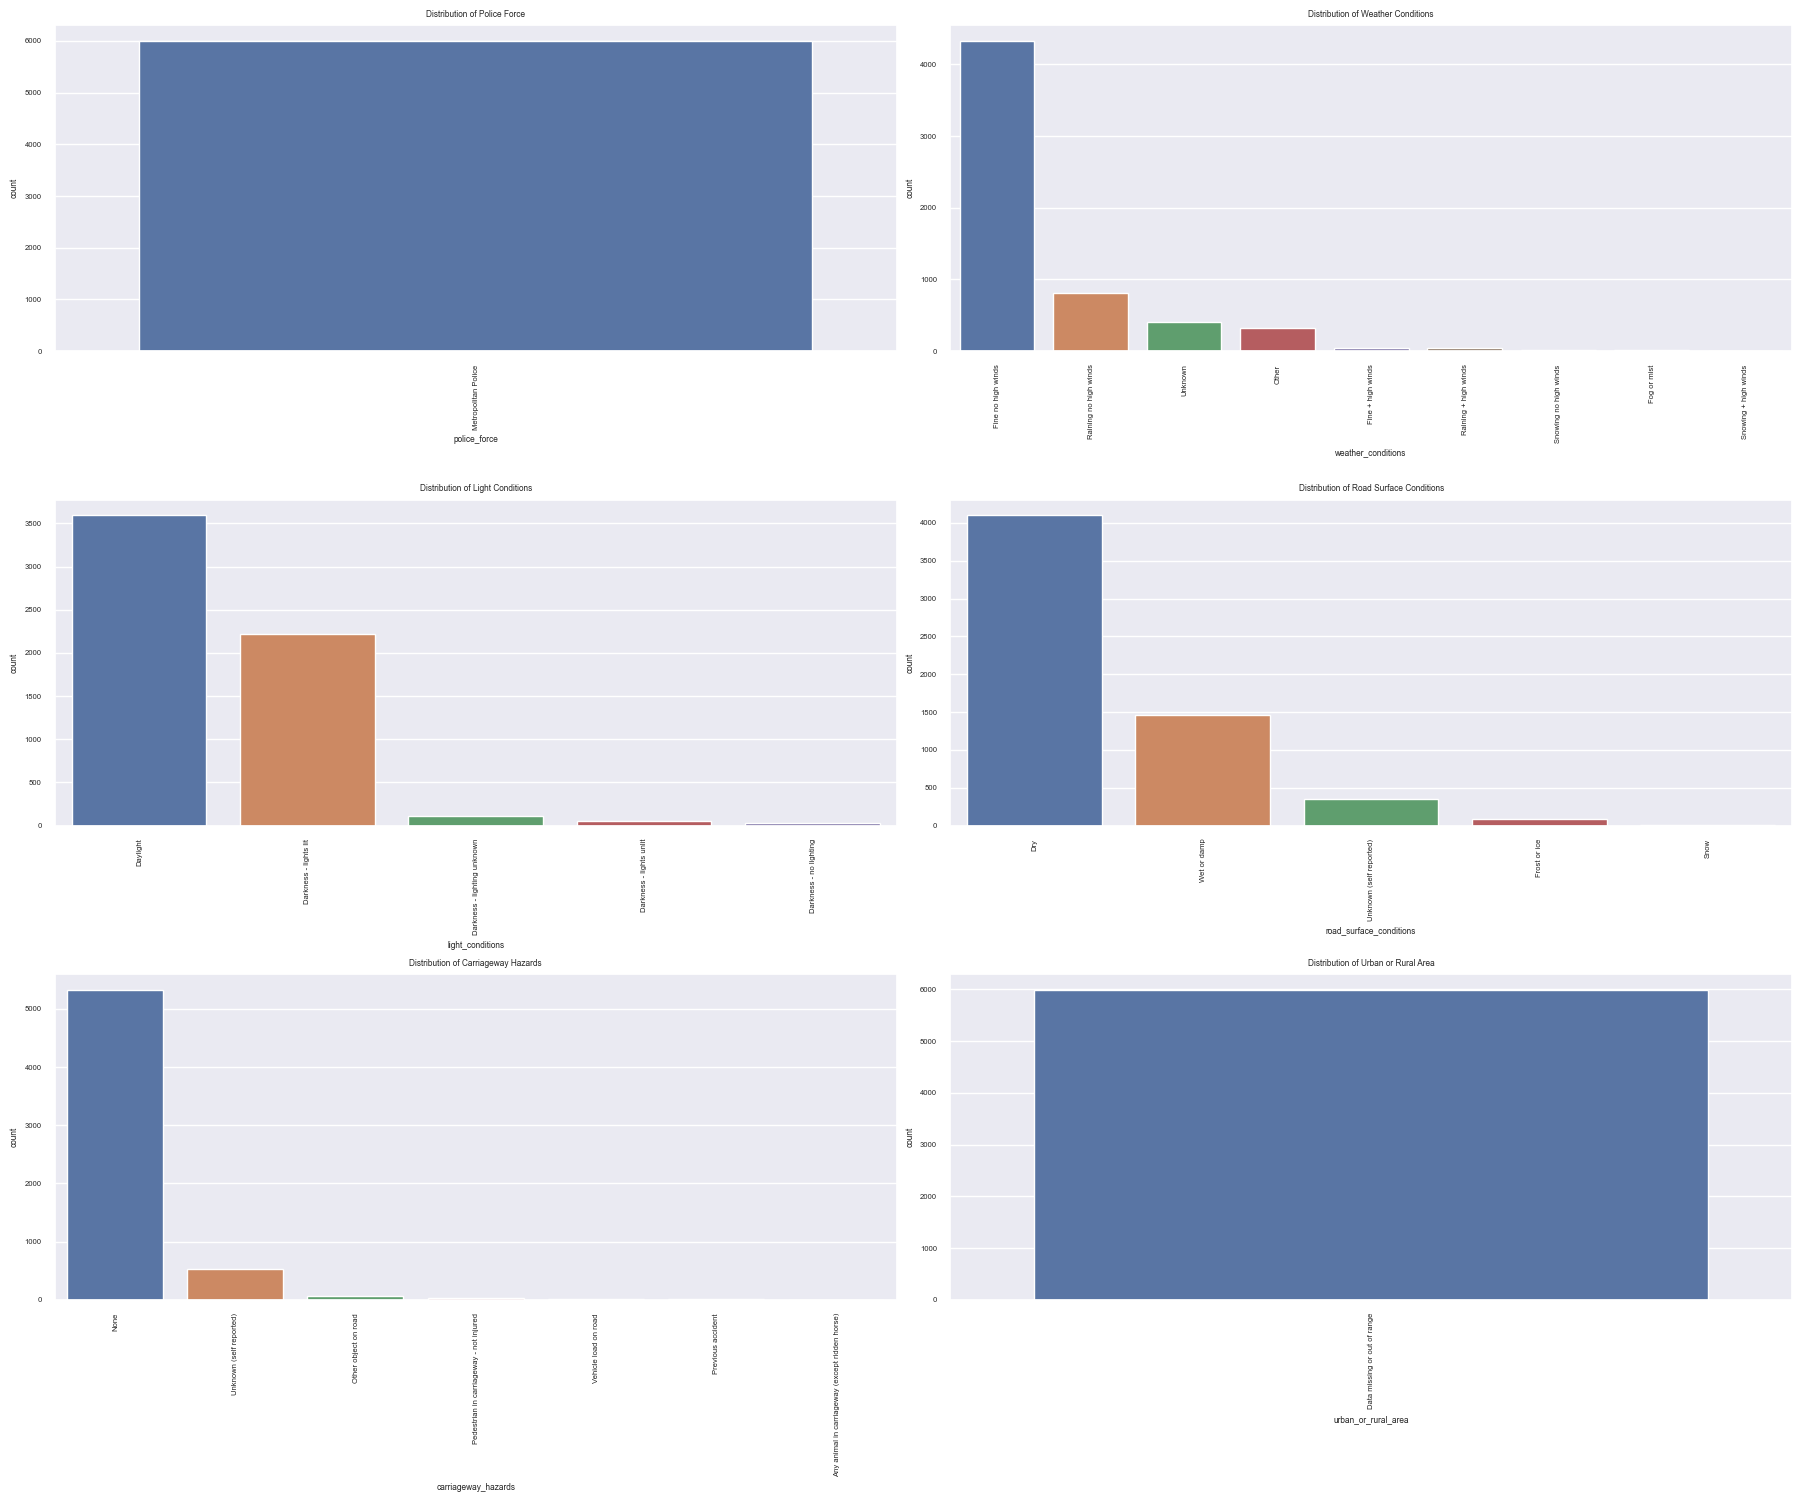

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))  

# Plotting 'police_force' distribution
sns.countplot(data=df, x='police_force', ax=axes[0, 0], order = df['police_force'].value_counts().index)
axes[0, 0].set_title('Distribution of Police Force')
axes[0, 0].tick_params(axis='x', rotation=90)  

# Plotting 'weather_conditions' distribution
sns.countplot(data=df, x='weather_conditions', ax=axes[0, 1], order = df['weather_conditions'].value_counts().index)
axes[0, 1].set_title('Distribution of Weather Conditions')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plotting 'light_conditions' distribution
sns.countplot(data=df, x='light_conditions', ax=axes[1, 0], order = df['light_conditions'].value_counts().index)
axes[1, 0].set_title('Distribution of Light Conditions')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plotting 'road_surface_conditions' distribution
sns.countplot(data=df, x='road_surface_conditions', ax=axes[1, 1], order = df['road_surface_conditions'].value_counts().index)
axes[1, 1].set_title('Distribution of Road Surface Conditions')
axes[1, 1].tick_params(axis='x', rotation=90)

# Plotting 'carriageway_hazards' distribution
sns.countplot(data=df, x='carriageway_hazards', ax=axes[2, 0], order = df['carriageway_hazards'].value_counts().index)
axes[2, 0].set_title('Distribution of Carriageway Hazards')
axes[2, 0].tick_params(axis='x', rotation=90)

# Plotting 'urban_or_rural_area' distribution
sns.countplot(data=df, x='urban_or_rural_area', ax=axes[2, 1], order = df['urban_or_rural_area'].value_counts().index)
axes[2, 1].set_title('Distribution of Urban or Rural Area')
axes[2, 1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


 ## Create dummies

Creating dummies for the categorical variables police force, weather conditions, light conditions, road surface conditions, carriageway hazards, and urban or rural area.

In [42]:
from sklearn.preprocessing import OneHotEncoder

def get_dummies(trainset, testset, old_col_name):
    """Given a trainset, a testset, and the name of a column holding a 
    categorical variable, fit an encoder on the trainset, and use the 
    encoder to add dummy columns into the trainset and testset."""
    
    one_hot_encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown='ignore')
    
    # Handle missing values and ensure the column is of type string
    trainset[old_col_name] = trainset[old_col_name].fillna('missing').astype(str)
    testset[old_col_name] = testset[old_col_name].fillna('missing').astype(str)
    
    # Reshape the column to 2-d array as expected by OneHotEncoder
    cat_vals_train = trainset[[old_col_name]]
    cat_vals_test = testset[[old_col_name]]
 
    # Fit the encoder on the trainset and transform both trainset and testset
    transformed_train = one_hot_encoder.fit_transform(cat_vals_train)
    transformed_test = one_hot_encoder.transform(cat_vals_test)
    
    # Generate new column names for the dummies
    new_col_names = one_hot_encoder.get_feature_names_out([old_col_name])[1:]  # Skipping the first column
    
    # Add the transformed data as new columns to the original DataFrames
    trainset[new_col_names] = transformed_train[:, 1:]  # Skipping the first column to avoid dummy variable trap
    testset[new_col_names] = transformed_test[:, 1:]
    
    return trainset, testset

# Adjust the column names as per your dataset's actual columns
relevant_columns = ["police_force", "weather_conditions", "light_conditions", 
                    "road_surface_conditions", "carriageway_hazards", "urban_or_rural_area"]

for col_name in relevant_columns:
    trainset, testset = get_dummies(trainset, testset, col_name)

# Verify the transformation
print(trainset.head())



   collision_index  collision_year  collision_reference  \
0     2.023010e+12            2023             10432870   
1     2.023010e+12            2023             10423780   
2     2.023010e+12            2023             10421253   
3     2.023010e+12            2023             10436558   
4     2.023010e+12            2023             10437285   

   location_easting_osgr  location_northing_osgr  longitude   latitude  \
0               508304.0                173795.0  -0.442713  51.452791   
1               530005.0                181540.0  -0.127715  51.517831   
2               525039.0                177006.0  -0.200853  51.478204   
3               531398.0                186729.0  -0.105715  51.564140   
4               532561.0                176469.0  -0.092801  51.471667   

  police_force  legacy_collision_severity  number_of_vehicles  ...  \
0            1                          3                   2  ...   
1            1                          3                   

In [43]:

testset.head()

,collision_index,collision_year,collision_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,legacy_collision_severity,number_of_vehicles,...,light_conditions_6,light_conditions_7,road_surface_conditions_3,road_surface_conditions_4,road_surface_conditions_9,carriageway_hazards_2,carriageway_hazards_3,carriageway_hazards_6,carriageway_hazards_7,carriageway_hazards_9
1924,2.023010e+12,2023,10425306,538098.0,181030.0,-0.011348,51.511329,1,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1255,2.023010e+12,2023,10423306,519334.0,178182.0,-0.282566,51.490004,1,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5398,2.023010e+12,2023,10436031,538391.0,162055.0,-0.014534,51.340745,1,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3008,2.023010e+12,2023,10428788,517719.0,179960.0,-0.305224,51.506322,1,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4274,2.023010e+12,2023,10432653,532871.0,194185.0,-0.081655,51.630797,1,3,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


After creating dummies for the categorical variables, we'll remove these original columns from both the training and test datasets to maintain datasets with purely numerical features, suitable for machine learning algorithms.

In [44]:
for col_name in ["police_force", "weather_conditions", "light_conditions", "road_surface_conditions", "carriageway_hazards", "urban_or_rural_area"]:
    del trainset[col_name]
    del testset[col_name]

In [45]:
trainset.head()

,collision_index,collision_year,collision_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,legacy_collision_severity,number_of_vehicles,number_of_casualties,...,light_conditions_6,light_conditions_7,road_surface_conditions_3,road_surface_conditions_4,road_surface_conditions_9,carriageway_hazards_2,carriageway_hazards_3,carriageway_hazards_6,carriageway_hazards_7,carriageway_hazards_9
0,2.023010e+12,2023,10432870,508304.0,173795.0,-0.442713,51.452791,3,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.023010e+12,2023,10423780,530005.0,181540.0,-0.127715,51.517831,3,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.023010e+12,2023,10421253,525039.0,177006.0,-0.200853,51.478204,3,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.023010e+12,2023,10436558,531398.0,186729.0,-0.105715,51.564140,3,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.023010e+12,2023,10437285,532561.0,176469.0,-0.092801,51.471667,3,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Renaming Column Names for train and test set

In [46]:
rename_columns = {
    'police_force_1': 'Police_Force_1',  # Example: Replace '1' with actual police force name if applicable
    'weather_conditions_1': 'Weather_Fine_No_High_Winds',
    'light_conditions_1': 'Light_Conditions_Daylight',
    'road_surface_conditions_1': 'Road_Surface_Conditions_Dry',
    'carriageway_hazards_1': 'Carriageway_Hazards_None',
    'urban_or_rural_area_1': 'Area_Urban'
}

trainset = trainset.rename(columns=rename_columns)

testset = testset.rename(columns=rename_columns)

print(trainset.head())


   collision_index  collision_year  collision_reference  \
0     2.023010e+12            2023             10432870   
1     2.023010e+12            2023             10423780   
2     2.023010e+12            2023             10421253   
3     2.023010e+12            2023             10436558   
4     2.023010e+12            2023             10437285   

   location_easting_osgr  location_northing_osgr  longitude   latitude  \
0               508304.0                173795.0  -0.442713  51.452791   
1               530005.0                181540.0  -0.127715  51.517831   
2               525039.0                177006.0  -0.200853  51.478204   
3               531398.0                186729.0  -0.105715  51.564140   
4               532561.0                176469.0  -0.092801  51.471667   

   legacy_collision_severity  number_of_vehicles  number_of_casualties  ...  \
0                          3                   2                     1  ...   
1                          3              

## Exporting the train and test set

In [47]:
# Exporting the train and test set with context-specific file names
trainset.to_excel("trainset_road-casualty-statistics-collision-provisional-mid-year-unvalidated-2023.xlsx", index=False)
testset.to_excel("testset_road-casualty-statistics-collision-provisional-mid-year-unvalidated-2023.xlsx", index=False)
